# Airline Passenger Satisfaction Prediction

In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, plot_confusion_matrix,classification_report
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier, plot_importance
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve

In [68]:
df=pd.read_csv('train.csv')

In [69]:
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [70]:
df.shape

(103904, 25)

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [72]:
df.isna().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

In [73]:
df.drop(['Unnamed: 0','id'], axis=1, inplace=True)

In [74]:
cat_features = [feature for feature in df.columns if df[feature].dtypes == 'O']
print('Number of categorical variables: ', len(cat_features))
print('Categorical variables columns:',cat_features)

Number of categorical variables:  5
Categorical variables columns: ['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction']


In [75]:
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
print('Number of numerical variables: ', len(numerical_features))
print('Numerical Variables Columns: ',numerical_features)

Number of numerical variables:  18
Numerical Variables Columns:  ['Age', 'Flight Distance', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']


## EDA

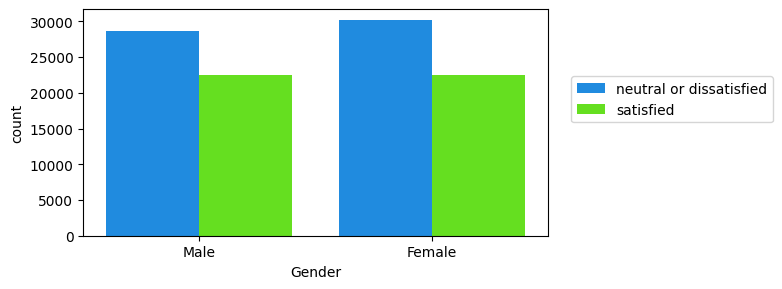

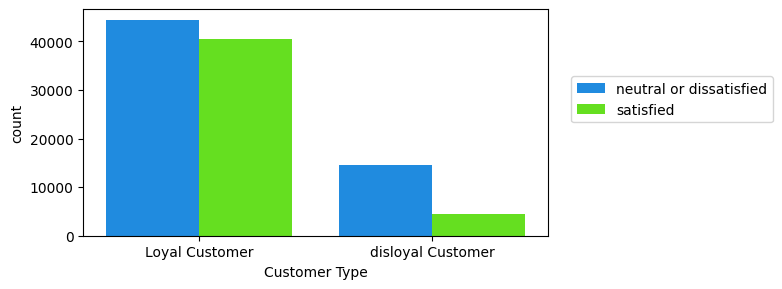

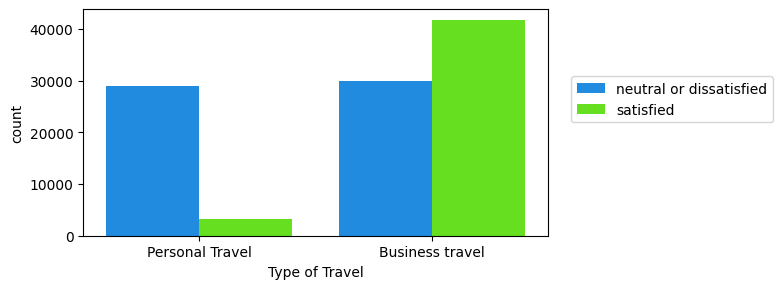

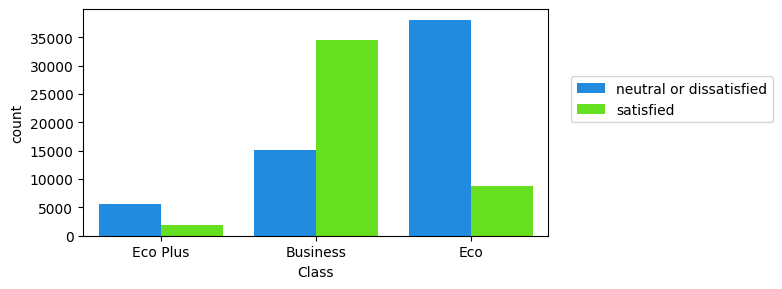

In [76]:
for col in cat_features[:-1]:
    plt.figure(figsize=(6,3), dpi=100)
    sns.countplot(data=df,x=col,hue ='satisfaction',palette='gist_rainbow_r')
    plt.legend(loc=(1.05,0.5))

- Gender doesn't seem to play too much of a role as men and women seem equally as concerned about the same factors
- Dissatisfaction level is high regardless of a customer's loyalty level
- Business travelers are generally more satifised than personal travelers
- People in economy seem the least satisfied

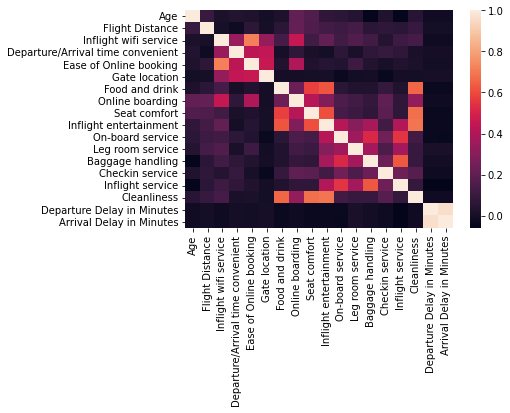

In [77]:
sns.heatmap(df.corr())

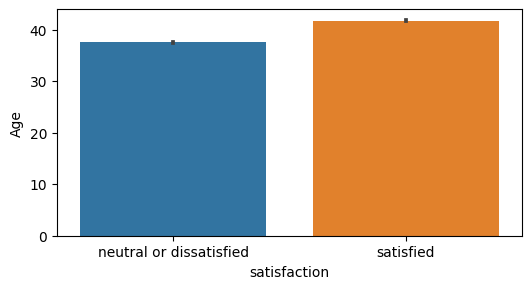

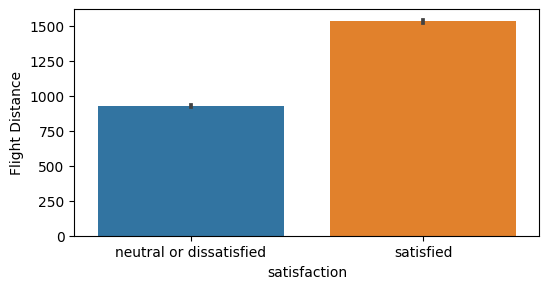

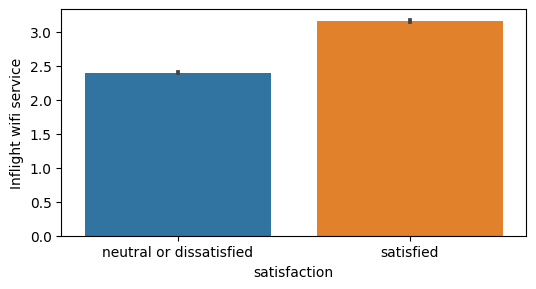

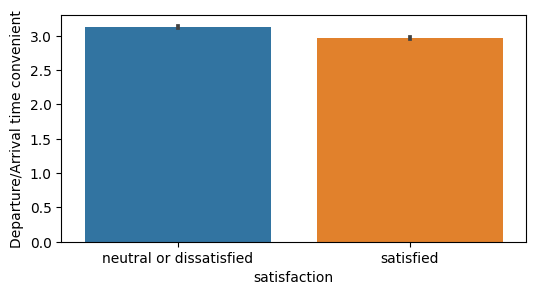

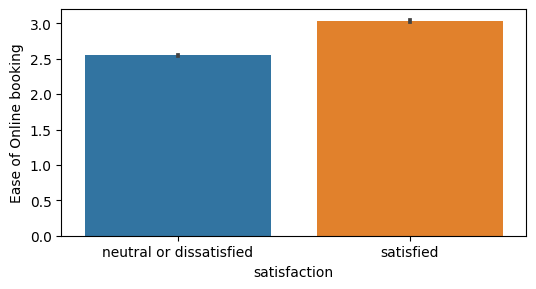

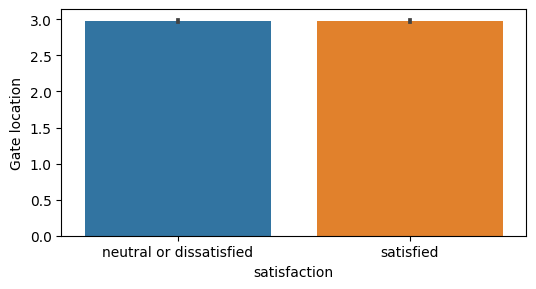

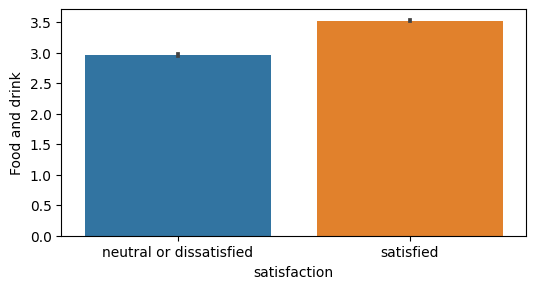

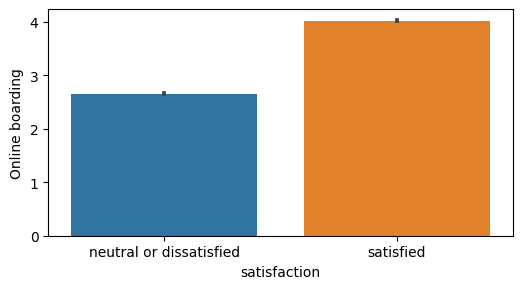

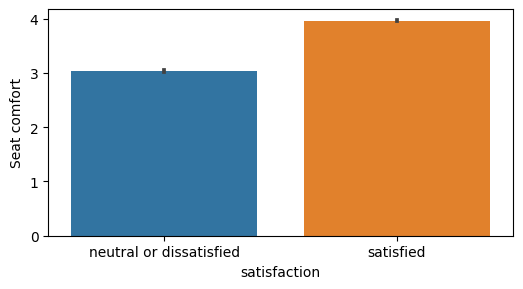

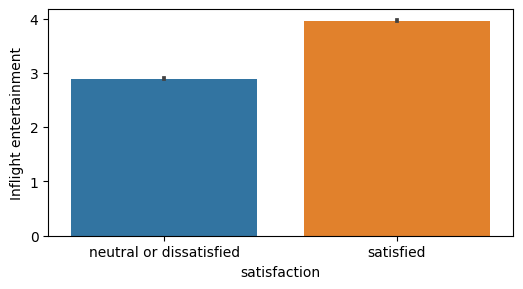

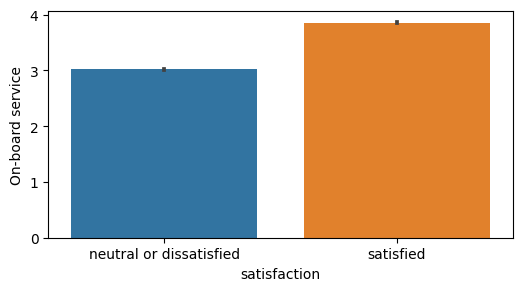

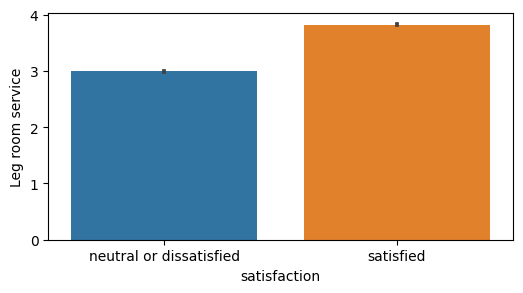

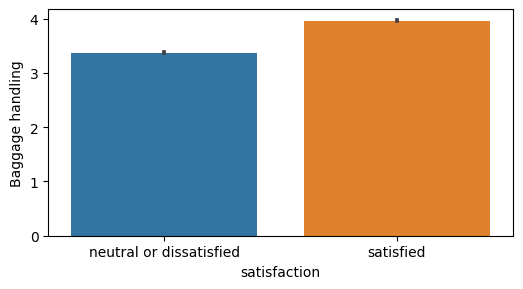

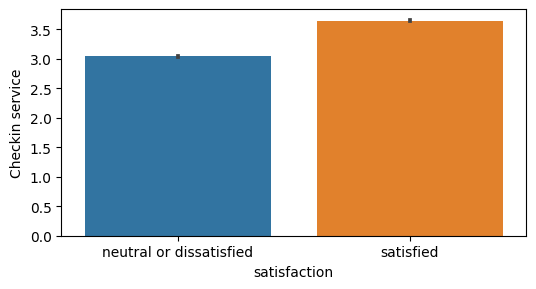

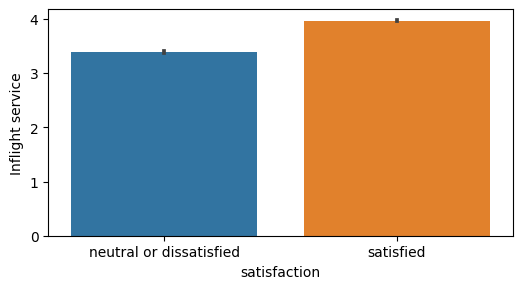

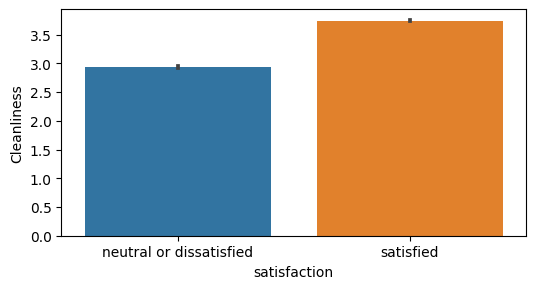

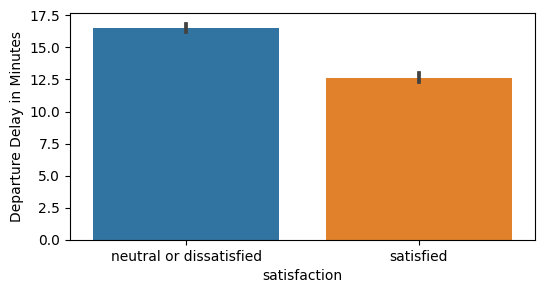

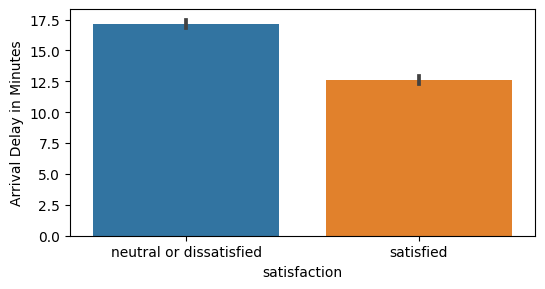

In [78]:
for col in numerical_features:
    plt.figure(figsize=(6,3), dpi=100)
    sns.barplot(data=df,x='satisfaction',y=col)

Age, gender, and gate location do not tell us much about flight satisfaction, so we can drop those columns. 

In [79]:
df.drop(['Age','Gender','Gate location'], axis=1, inplace=True)

In [80]:
df.groupby('satisfaction')['Arrival Delay in Minutes'].mean()

satisfaction
neutral or dissatisfied    17.127536
satisfied                  12.630799
Name: Arrival Delay in Minutes, dtype: float64

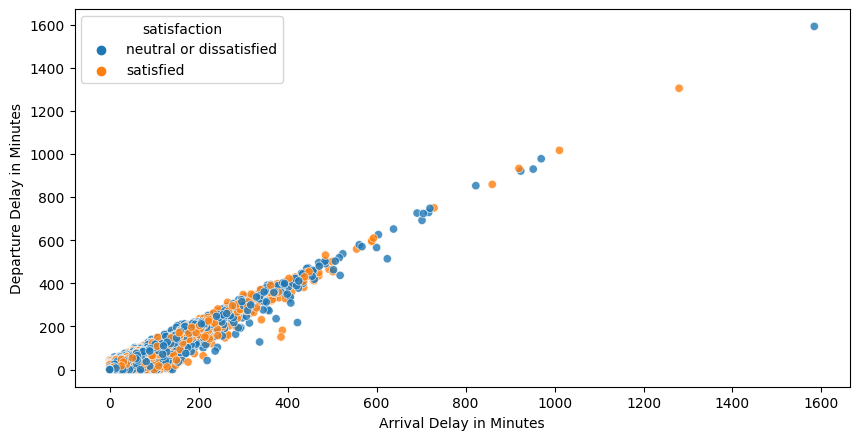

In [81]:
plt.figure(figsize=(10,5), dpi=100)
sns.scatterplot(data=df,x='Arrival Delay in Minutes',y='Departure Delay in Minutes',hue='satisfaction', alpha=0.8)

There is a strong linear relationship between arrival delay and departure delay which makes sense. 

(0.0, 1000.0)

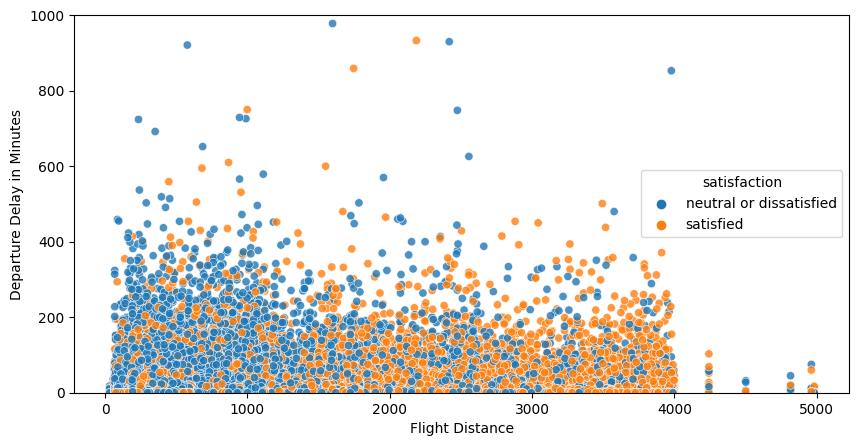

In [82]:
plt.figure(figsize=(10,5), dpi=100)
sns.scatterplot(data=df,x='Flight Distance',y='Departure Delay in Minutes',hue='satisfaction', alpha=0.8)
plt.ylim(0,1000)

If a flight inherently has a longer distance, most passengers are fine with a depareture delay which may be strange to consider. Departure delay is less of a factor for long distance flights. Short distance customers are usually not happy with any delay in their flights. 

In [83]:
df.groupby('Class').mean()

,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
Class,,,,,,,,,,,,,,,,
Business,1675.976925,2.775315,2.905910,2.913964,3.323165,3.716541,3.760858,3.635437,3.679472,3.644498,3.842907,3.519178,3.844579,3.477600,14.398067,14.577272
Eco,743.439748,2.675067,3.199123,2.605241,3.086277,2.812985,3.138838,3.098256,3.120355,3.085720,3.450551,3.122002,3.463921,3.108097,15.160509,15.672183
Eco Plus,747.125567,2.767948,3.217507,2.661996,3.122631,2.889245,3.183747,3.141713,3.047638,3.061382,3.363758,3.017214,3.388444,3.130771,15.431545,16.088645


Business class travellers have mostly given higher ratings for many of these services, so class of travel is a huge factor in overall satisfaction

## Data Cleaning and Feature Engineering

In [84]:
df_copy=df.copy()

In [85]:
df_copy.isna().sum()

Customer Type                          0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

Arrival and departure delay have a linear relationship so we can subsitute the missing arrival delay values with depature delay values

In [86]:
df.loc[df['Arrival Delay in Minutes'].isna(),'Arrival Delay in Minutes']=df.loc[df['Arrival Delay in Minutes'].isna()]['Departure Delay in Minutes']

In [87]:
df=df.dropna()

In [88]:
df.isna().sum()

Customer Type                        0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [89]:
df['satisfaction'] = df['satisfaction'].map({'neutral or dissatisfied':0 , 'satisfied':1})
df['Customer Type'] = df['Customer Type'].map({'Loyal Customer':1, 'disloyal Customer':0})
df['Type of Travel'] = df['Type of Travel'].map({'Personal Travel':0, 'Business travel':1})

In [90]:
df=pd.get_dummies(df)

In [91]:
df.head()

,Customer Type,Type of Travel,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Class_Business,Class_Eco,Class_Eco Plus
0,1,0,460,3,4,3,5,3,5,5,...,4,4,5,5,25,18.0,0,0,0,1
1,0,1,235,3,2,3,1,3,1,1,...,3,1,4,1,1,6.0,0,1,0,0
2,1,1,1142,2,2,2,5,5,5,5,...,4,4,4,5,0,0.0,1,1,0,0
3,1,1,562,2,5,5,2,2,2,2,...,3,1,4,2,11,9.0,0,1,0,0
4,1,1,214,3,3,3,4,5,5,3,...,4,3,3,3,0,0.0,1,1,0,0


## Modeling

In [92]:
X = df.drop('satisfaction', axis=1)
y = df['satisfaction']

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [96]:
pipeline = Pipeline([('standard_scaler',StandardScaler()),])
scaled_X_train = pipeline.fit_transform(X_train)
scaled_X_test = pipeline.transform(X_test)

In [97]:
kfold = StratifiedKFold(n_splits=10)

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


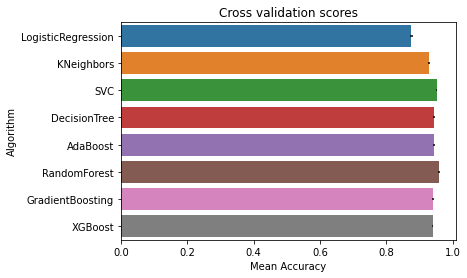

In [99]:
random_state = 2
classifiers = []
classifiers.append(LogisticRegression(random_state = random_state))
classifiers.append(KNeighborsClassifier())
classifiers.append(SVC(random_state=random_state))
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(XGBClassifier(random_state=random_state))

cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, scaled_X_train, y = y_train, scoring = "accuracy", cv = kfold, n_jobs=4))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["LogisticRegression","KNeighbors","SVC","DecisionTree","AdaBoost",
"RandomForest","GradientBoosting","XGBoost"]})

g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, **{'xerr':cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")

Random Forest works the best with an accuracy of 95.5%

In [105]:
model_rf = RandomForestClassifier(random_state=random_state)
model_rf.fit(scaled_X_train,y_train)

RandomForestClassifier(random_state=2)

In [106]:
pred_rf = model_rf.predict(scaled_X_test)
accuracy_score(y_test,pred_rf)

0.9596747028535682

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


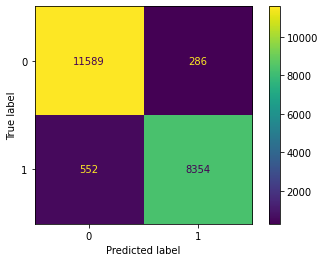

In [107]:
plot_confusion_matrix(model_rf,scaled_X_test,y_test)

In [108]:
print(classification_report(y_test,pred_rf))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97     11875
           1       0.97      0.94      0.95      8906

    accuracy                           0.96     20781
   macro avg       0.96      0.96      0.96     20781
weighted avg       0.96      0.96      0.96     20781



In [119]:
pd.DataFrame(model_rf.feature_importances_, index =X.columns,  columns=['importance']).sort_values('importance', ascending=False)

,importance
Online boarding,0.181475
Inflight wifi service,0.146334
Type of Travel,0.093791
Class_Business,0.066907
Inflight entertainment,0.061991
Seat comfort,0.052018
Flight Distance,0.043734
Class_Eco,0.042280
Ease of Online booking,0.040859
Leg room service,0.038804


Text(0.5, 1.0, 'Feature Importance')

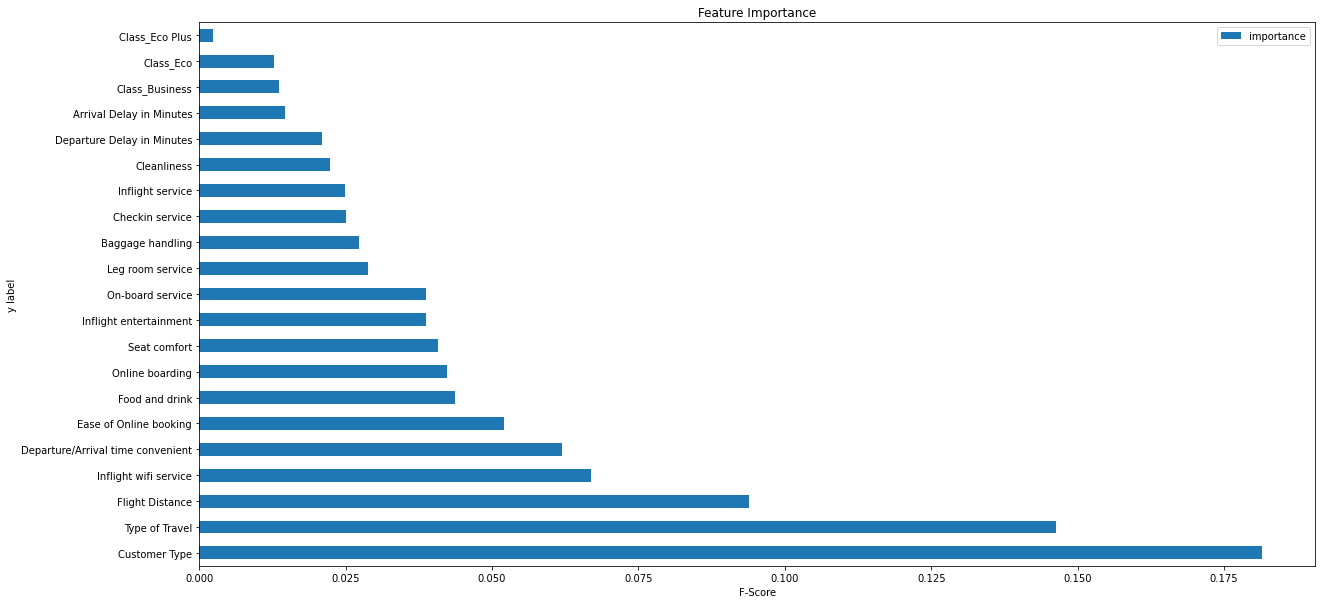

In [121]:
orig_feature_names = X_train.columns


data = pd.DataFrame(model_rf.feature_importances_, index =X.columns,  columns=['importance']).sort_values('importance', ascending=False)
ax =data.plot(kind='barh', figsize = (20,10))
ax.set_yticklabels(orig_feature_names); 
ax.set(xlabel="F-Score", ylabel="y label")
ax.set_title('Feature Importance')

This Random Forest model considerably outperformed FOLD-RM and we can see that the class of travel, arrival and departure delays, and flight services are crucial factors that affected customer satisfaction in this case. 